In [1]:
from handwriting_generator import HandwritingGenerator, default_config
import cv2
from transforms import *
import matplotlib
import matplotlib.pyplot as plt
import os

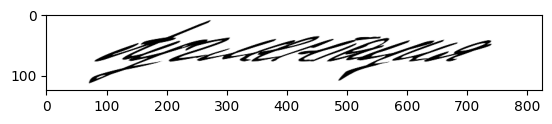

In [2]:
default_config["font_name"] = "../fonts/Capuletty.ttf"
generator = HandwritingGenerator(default_config)
img = generator.write_word("Аугментация", randomize_skew=True)
img = img.astype(np.uint8)
plt.imshow(img)

In [3]:
prob = 1
t = [
    CLAHE(prob),
    GaussNoise(prob),
    ISONoise(prob),
    MultiplicativeNoise(prob),
    ImageCompression(prob),
    Sharpen(prob),
    MotionBlur(prob),
    MedianBlur(prob),
    RandomCrop(rnd_crop_min=0.80),
    RotateAndCrop(2),
    Rotate(2, prob),
    SafeRotate(5, prob),
    ElasticTransform(prob),
    GridDistortion(prob),
    OpticalDistortion(prob),
    Perspective(prob),
    RandomBrightnessContrast(prob),
    RandomGamma(prob),
    HueSaturationValue(prob),
    RandomSnow(prob),
    RandomShadow()
]

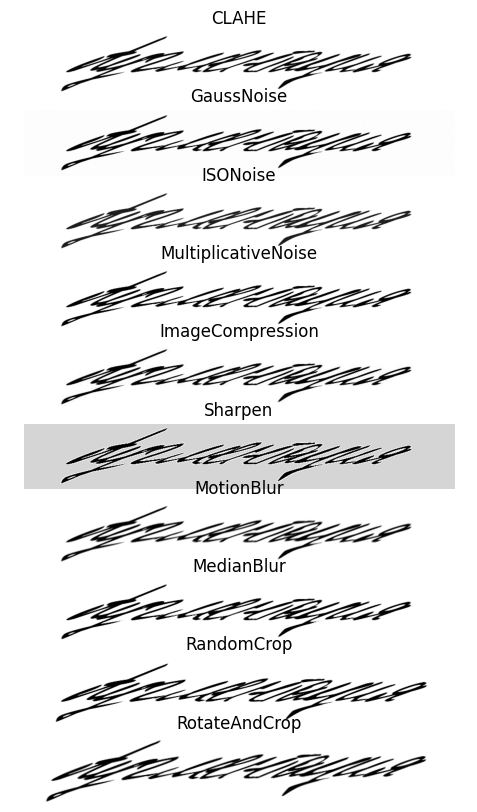

In [4]:
fig = plt.figure(figsize=(50, 10))
rows, columns = 10, 1

for i, transformation in enumerate(t[:10], start=1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(transformation(img))
    plt.axis('off')
    plt.title(transformation.__class__.__name__)

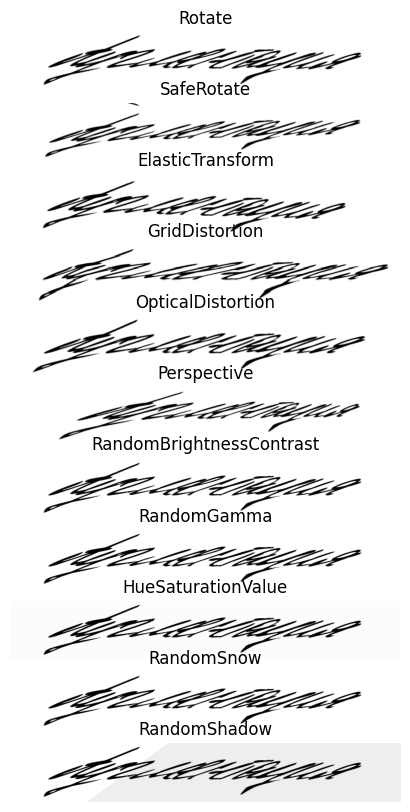

In [6]:
fig = plt.figure(figsize=(50, 10))
rows, columns = len(t) - 10, 1

for i, transformation in enumerate(t[10:], start=1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(transformation(img))
    plt.axis('off')
    plt.title(transformation.__class__.__name__)